<a href="https://colab.research.google.com/github/sallinaabc/sallina_work/blob/main/TugasDataMining_Naive_Bayes_dan_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [102]:
#pemanggilan data
data = pd.read_csv("Data Lulus Tepat Waktu.csv")

In [103]:
data.head()

,ip1,ip2,ip3,ip4,tepat
0,2.30,1.97,1.80,1.56,Tidak
1,1.81,1.68,1.57,1.86,Tidak
2,3.07,3.00,2.75,3.21,Tidak
3,2.71,2.33,2.61,1.98,Tidak
4,3.17,3.02,3.28,2.96,Tidak


In [ ]:
data.tail(5)

,ip1,ip2,ip3,ip4,tepat
1682,3.07,3.04,3.39,3.55,Ya
1683,3.29,3.22,3.33,3.68,Ya
1684,3.31,3.25,3.44,3.52,Ya
1685,3.44,3.35,3.50,3.50,Ya
1686,3.18,3.05,3.05,3.27,Ya


In [ ]:
#melihat statistika deskriptif
data.describe()

,ip1,ip2,ip3,ip4
count,1687.000000,1687.000000,1687.000000,1687.000000
mean,3.174458,3.170551,3.249988,3.285993
std,0.347761,0.454393,0.339506,0.398833
min,0.830000,0.230000,0.550000,0.900000
25%,3.020000,3.060000,3.120000,3.170000
50%,3.220000,3.270000,3.310000,3.390000
75%,3.405000,3.440000,3.460000,3.520000
max,3.860000,4.000000,3.920000,3.910000


In [ ]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687 entries, 0 to 1686
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ip1     1687 non-null   float64
 1   ip2     1687 non-null   float64
 2   ip3     1687 non-null   float64
 3   ip4     1687 non-null   float64
 4   tepat   1687 non-null   object 
dtypes: float64(4), object(1)
memory usage: 66.0+ KB


Berdasarkan output diatas, dapat disimpulkan bahwa dataset tersebut, memiliki total: 5 kolom, dengan jumlah maksimal baris untuk setiap kolom sebanyak: 1687 baris. Akan tetapi terdapat beberapa kolom yang memiliki jumlah baris < 5042, maka akan dilakukan proses identifikasi lebih lanjut.

#DETEKSI MISSING VALUE

In [ ]:
data.isnull()

,ip1,ip2,ip3,ip4,tepat
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1682,False,False,False,False,False
1683,False,False,False,False,False
1684,False,False,False,False,False
1685,False,False,False,False,False


In [ ]:
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
ip1,0
ip2,0
ip3,0
ip4,0
tepat,0


Berdasarkan output summarize tersebut, diperoleh bahwa tidak terdapat kolom yang mengandung missing values.

In [ ]:
#mengetahui jumlah missing value di seluruh dataset
data.isnull().sum().sum()

np.int64(0)

#HANDLING MISSING VALUE

Data tidak mengandung missing values, sehingga tidak perlu dilakukan handling missing value karena semua data sudah lengkap dan siap digunakan untuk analisis.

#CEK DAN PENANGANAN OUTLIER

1. Boxplot

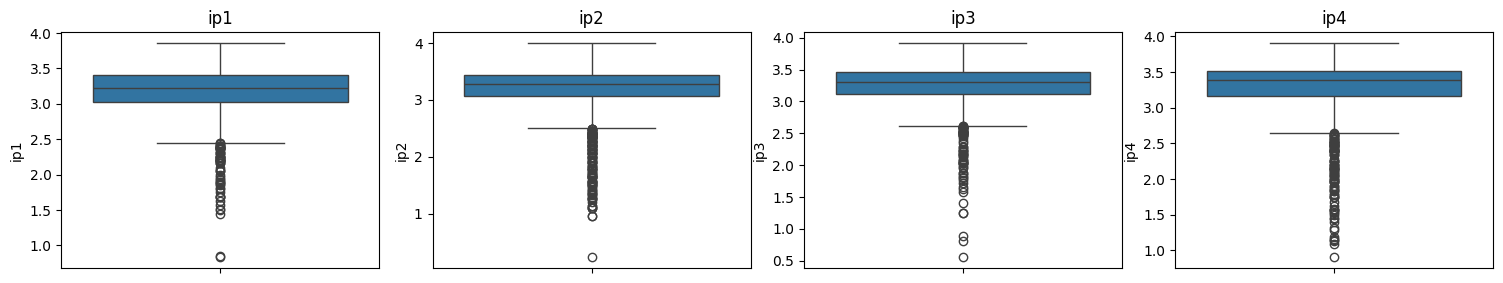

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang ingin dicek outliernya
num_cols = ['ip1','ip2','ip3','ip4']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

2. IQR

In [ ]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")

ip1: 64 outliers
ip2: 131 outliers
ip3: 71 outliers
ip4: 107 outliers


In [ ]:
def winsorize_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Terapkan Winsorizing
for col in num_cols:
    winsorize_iqr(data, col)

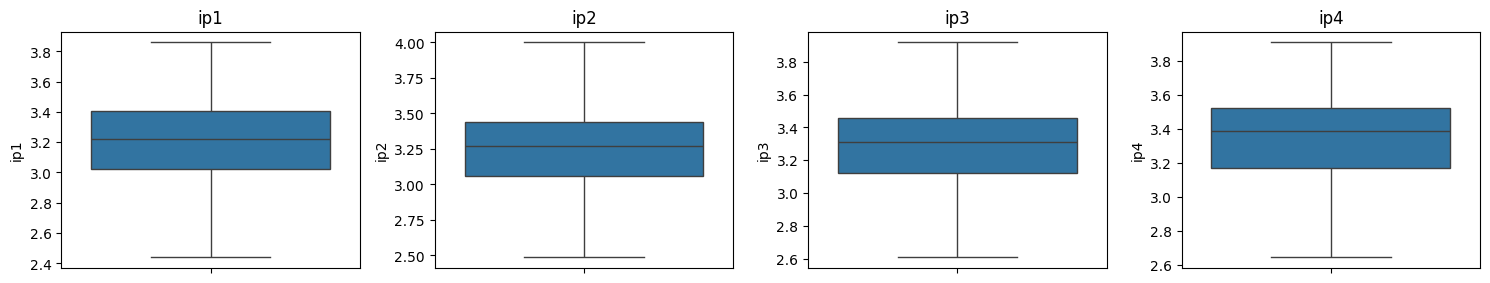

In [ ]:
#cek boxplot lagi

num_cols = ['ip1','ip2','ip3','ip4']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

#ENCODING DATA KATEGORIK

Encoding digunakan untuk mengubah kolom tepat yang berisi kategori Ya dan Tidak menjadi angka 1 dan 0 dengan menggunakan Metode One-Hot Encoding atau OHE.

In [ ]:
#melihat isi dalam kolom
data['tepat'].unique()

array(['Tidak', 'Ya'], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
One_encode = OneHotEncoder()

In [ ]:
One_encoder = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False).set_output(transform='pandas')

In [ ]:
encoded_tepat = One_encoder.fit_transform(data[['tepat']])

In [ ]:
data_encoded = pd.concat([data, encoded_tepat], axis=1)

In [ ]:
print(data_encoded.head())

      ip1   ip2   ip3    ip4  tepat  tepat_Tidak  tepat_Ya
0  2.4425  2.49  2.61  2.645  Tidak          1.0       0.0
1  2.4425  2.49  2.61  2.645  Tidak          1.0       0.0
2  3.0700  3.00  2.75  3.210  Tidak          1.0       0.0
3  2.7100  2.49  2.61  2.645  Tidak          1.0       0.0
4  3.1700  3.02  3.28  2.960  Tidak          1.0       0.0


#PENGKLASIFIKASIAN

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [49]:
data_encoded.tail(15)

,ip1,ip2,ip3,ip4,tepat,tepat_Tidak,tepat_Ya
1672,3.47,2.91,3.34,3.50,Ya,0.0,1.0
1673,3.17,3.12,3.35,3.50,Ya,0.0,1.0
1674,3.29,3.27,3.38,3.68,Ya,0.0,1.0
1675,3.29,3.28,3.49,3.58,Ya,0.0,1.0
1676,3.19,3.27,3.32,3.55,Ya,0.0,1.0
1677,3.62,3.39,3.56,3.72,Ya,0.0,1.0
1678,3.42,3.28,3.50,3.58,Ya,0.0,1.0
1679,2.98,3.12,3.24,3.58,Ya,0.0,1.0
1680,3.13,2.96,3.21,3.38,Ya,0.0,1.0
1681,3.20,3.26,3.36,3.50,Ya,0.0,1.0


Setiap baris dalam dataset mewakili satu mahasiswa yang telah mengikuti wisuda, dan penjelasan setiap kolom-kolomnya sebagai berikut:
ip1 : indeks prestasi yang diperoleh mahasiswa di semester 1
ip2 : indeks prestasi yang diperoleh mahasiswa di semester 2
ip3 : indeks prestasi yang diperoleh mahasiswa di semester 3
ip4 : indeks prestasi yang diperoleh mahasiswa di semester 4
tepat : Variabel target atau label yang menunjukkan apakah mahasiswa lulus tepat waktu.

In [50]:
count_values = data_encoded['tepat_Ya'].value_counts()
count_values

,count
tepat_Ya,
1.0,1552
0.0,135


In [54]:
# Pilih hanya kolom numerik dari data_encoded
numerik_data = data_encoded.select_dtypes(include='number')

# Menghitung rata-rata berdasarkan nilai 'tepat_Ya'
mean_by_tepat_Ya = numerik_data.groupby('tepat_Ya').mean()

# Menampilkan rata-rata untuk setiap variabel berdasarkan nilai 'tepat_Ya'
print(mean_by_tepat_Ya)

               ip1       ip2       ip3       ip4  tepat_Tidak
tepat_Ya                                                     
0.0       2.997315  3.024593  3.064444  3.119852          1.0
1.0       3.205627  3.231972  3.287004  3.338779          0.0


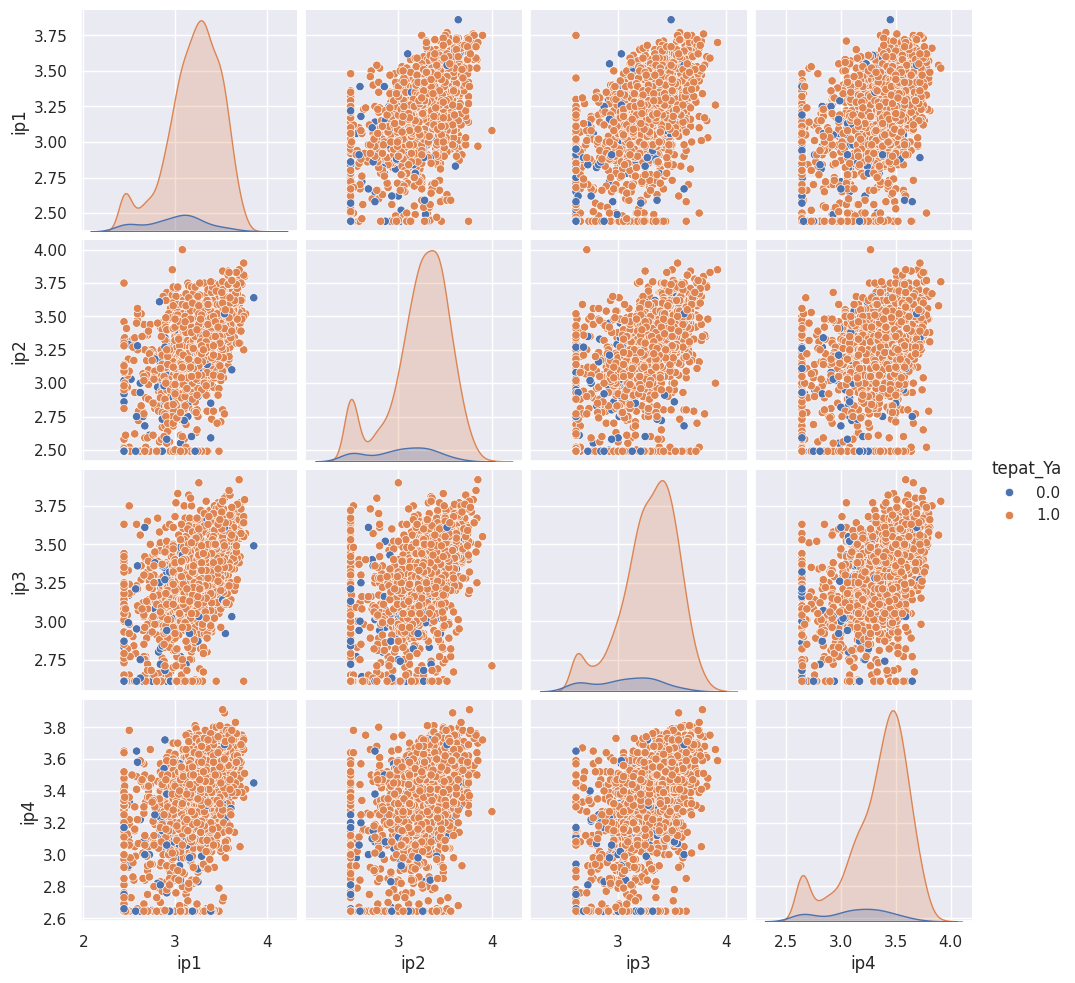

In [56]:
#visualisasi. warna dibedakan berdasarkan lulus tepat waktu atau tidak
sns.pairplot(numerik_data, vars=['ip1','ip2','ip3','ip4'], hue='tepat_Ya')

Kode ini menggunakan sns.pairplot dari library Seaborn untuk membuat visualisasi hubungan antara pasangan variabel dari dataset. Di sini, variabel-variabel yang dipilih untuk dianalisis adalah 'ip1', 'ip2', 'ip3', 'ip4'.

sns.pairplot: Ini adalah fungsi dari Seaborn yang menghasilkan grid dari scatter plots (plot titik-titik) yang menunjukkan hubungan antara pasangan variabel. Data Lulus Tepat Waktu : Merupakan dataset yang digunakan untuk membuat pairplot. vars: Digunakan untuk menentukan variabel-variabel yang ingin dimunculkan dalam pairplot. hue='data': Variabel 'tepat_Ya' akan digunakan untuk membedakan data. Dalam hal ini, warna plot akan diberikan berdasarkan nilai dari kolom 'tepat_Ya', yaitu apakah mahasiswa lulus tepat waktu atau tidak. Dengan menggunakan pairplot dan membagi warna berdasarkan 'tepat_Ya', setiap scatter plot dalam grid akan menunjukkan hubungan antara dua variabel, di mana titik-titik diberi warna yang berbeda tergantung pada apakah mahasiswa lulus tepat waktu atau tidak. Ini membantu untuk melihat pola atau tren yang mungkin ada dalam hubungan antar variabel dan bagaimana pola tersebut berkaitan dengan tepat atau tidaknya wqktu kelulusan mahasiswa.

In [59]:
import seaborn as sns
import pandas as pd

# Hitung korelasi terhadap 'TepatWaktu'
correlation_with_tepat_Ya = numerik_data.corr()['tepat_Ya'].sort_values(ascending=False)
print(correlation_with_tepat_Ya)

tepat_Ya       1.000000
ip3            0.223700
ip4            0.207942
ip1            0.189161
ip2            0.175874
tepat_Tidak   -1.000000
Name: tepat_Ya, dtype: float64


ip1 memiliki korelasi sebesar  0.189161 dengan tepat_Ya. Hal ini menunjukkan bajwa ada hubungan positif yang  sangat lemah antara ip1 dan kemungkinan mahasiswa lulus tepat waktu.

ip2 memiliki korelasi sebesar 0.175874 dengan tepat_Ya. Hal ini menunjukkan bajwa ada hubungan positif yang sangat lemah antara ip2 dan kemungkinan mahasiswa lulus tepat waktu.

ip3 memiliki korelasi sebesar 0.223700 dengan tepat_Ya. Hal ini menunjukkan bajwa ada hubungan positif yang lemah antara ip1 dan kemungkinan mahasiswa lulus tepat waktu.

ip4 memiliki korelasi sebesar 0.207942 dengan tepat_Ya. Hal ini menunjukkan bajwa ada hubungan positif yang lemah antara ip1 dan kemungkinan mahasiswa lulus tepat waktu.

#MEMISAHKAN VARIABEL X DAN Y

In [61]:
#memisahkan data menjadi variabel x dan y
X=numerik_data.drop(['tepat_Ya'], axis=1)
y=numerik_data['tepat_Ya']

#MEMBAGI DATA MENJADI DATA TRAINING DAN TESTING

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.model_selection import train_test_split: Ini adalah baris yang mengimpor fungsi train_test_split dari pustaka Scikit-Learn. Fungsi ini memungkinkan untuk dengan mudah membagi dataset menjadi bagian training dan testing.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0): Ini adalah pemanggilan fungsi train_test_split. Parameter yang digunakan adalah sebagai berikut:

X: Merupakan variabel yang berisi fitur atau atribut-atribut dari dataset.(ingat X besar) y: Merupakan variabel yang berisi target atau label dari dataset. (ingat y kecil) test_size=0.2: Parameter ini menentukan proporsi dari dataset yang akan dialokasikan untuk testing. Dalam contoh ini, 0.2 berarti 20% dari data akan menjadi data testing. random_state=0: Parameter ini menentukan seed atau nilai awal untuk generator angka acak yang digunakan dalam pembagian data. Ini berguna untuk memastikan bahwa pembagian data ini dapat direproduksi secara konsisten. Jika nilai ini tetap, pembagian data akan sama setiap kali kode ini dijalankan.

Hasil dari fungsi train_test_split adalah empat keluaran:

X_train: Data training untuk fitur-fitur. X_test: Data testing untuk fitur-fitur. y_train: Data training untuk target atau label. y_test: Data testing untuk target atau label. Dengan memisahkan dataset menjadi empat bagian ini, X_train dan y_train digunakan untuk melatih model, sementara X_test dan y_test digunakan untuk menguji performa model yang telah dilatih. Ini membantu dalam mengevaluasi seberapa baik model yang dihasilkan mampu menggeneralisasi pada data baru yang belum pernah dilihat sebelumnya.

In [63]:
from sklearn.preprocessing import LabelEncoder

for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train)

[[0.         0.         0.41221374 0.57312253 0.        ]
 [0.5696649  0.60264901 0.57251908 0.62055336 0.        ]
 [0.39329806 0.46357616 0.50381679 0.         0.        ]
 ...
 [0.39329806 0.47019868 0.50381679 0.6916996  0.        ]
 [0.44973545 0.36423841 0.35114504 0.32806324 0.        ]
 [0.76719577 0.59602649 0.72519084 0.43873518 0.        ]]


MinMaxScaler adalah salah satu metode dalam Scikit-Learn yang digunakan untuk melakukan normalisasi atau penyekalaan fitur-fitur pada rentang nilai tertentu, biasanya antara 0 dan 1.

Pada kode yang diberikan:

MinMaxScaler().fit_transform(X_train) digunakan untuk melakukan normalisasi pada data training (X_train). MinMaxScaler().fit_transform(X_test) digunakan untuk melakukan normalisasi pada data testing (X_test). Pada intinya, MinMaxScaler melakukan normalisasi fitur-fitur dengan cara mengubah nilai setiap fitur sehingga rentang nilainya berada dalam interval yang ditentukan (biasanya antara 0 dan 1).

fit_transform() digunakan untuk melakukan dua hal sekaligus: fit(): Menghitung nilai minimum dan maksimum untuk setiap fitur di data training. transform(): Melakukan normalisasi dengan menggunakan nilai minimum dan maksimum yang sudah dihitung tadi untuk mengubah setiap fitur dalam rentang nilai yang diinginkan.

#NAIVE BAYES

Langkah-langkah pemodelan Naive Bayes
1. Mengimpor dan Membuat Model Naive Bayes
2. Melatih Model dengan Data Training
3. Menghitung Akurasi pada Data Training
4. Memprediksi Data Uji
5. Menghitung Akurasi Data Uji

In [91]:
# Mengimpor dan Membuat Model Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [92]:
# Melatih Model dengan Data Training
nb.fit(X_train, y_train)

GaussianNB()

In [93]:
# Menghitung Akurasi pada Data Training
nb.score(X_train, y_train)

1.0

Akurasi pada data latih adalah 1.0 (100%), menandakan model sangat baik dalam mengenali pola dari data latih, meskipun ini bisa juga mengindikasikan overfitting (jika tidak hati-hati).

In [94]:
#Memprediksi Data Uji
classif_name = ['NB']
y_predict = {}
y_predict['NB'] = nb.predict(X_test)

In [72]:
#Menghitung Akurasi Data Uji
from sklearn.metrics import accuracy_score
#import accurary_score
for name in classif_name:
    print('{0} accuracy = {1:.4f}'.format(name, accuracy_score(y_test, y_predict[name])))

NB accuracy = 1.0000


Akurasi prediksi pada data uji adalah 1.0, yang berarti semua prediksi benar. Hasil ini sangat baik, tetapi perlu diperiksa apakah data terlalu mudah atau tidak seimbang.



#PROSES MEMBUAT MODEL DENGAN NEUTRAL NETWORK

In [73]:
#Menguji parameter yang paling optimum untuk model

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)



# Tentukan parameter yang ingin diuji
parameters = {
    'hidden_layer_sizes': [(50,), (100,), (50, 30), (100, 50)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [100, 200, 300]
}

# Buat model MLPClassifier
clf = MLPClassifier(random_state=100)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(clf, parameters, cv=cv_strategy)
# cv merupakan jumlah lipatan validasi silang (cross-validation)

# Lakukan pencarian grid pada data training
grid_search.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=MLPClassifier(random_state=100),
             param_grid={'hidden_layer_sizes': [(50,), (100,), (50, 30),
                                                (100, 50)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'max_iter': [100, 200, 300]})

Tentukan Parameter yang Ingin diuji: parameters adalah kamus yang berisi parameter-parameter yang ingin diuji. Pada contoh ini, parameter yang diuji meliputi hidden_layer_sizes (berbagai kombinasi jumlah dan ukuran hidden layers), learning_rate_init (berbagai tingkat pembelajaran awal), dan max_iter (berbagai jumlah iterasi).

Inisialisasi Model: MLPClassifier() digunakan untuk membuat model Neural Network Multi-Layer Perceptron (MLP) dengan parameter default.

Untuk memastikan bahwa hasil dari GridSearchCV konsisten setiap kali dijalankan, kamu bisa menambahkan argumen random_state pada GridSearchCV dan MLPClassifier. Penggunaan random_state ini akan memastikan bahwa inisialisasi yang melibatkan keputusan acak (seperti pembagian data menjadi lipatan validasi silang atau inisialisasi parameter awal pada Neural Network) dilakukan secara konsisten dalam setiap percobaan.Penting untuk dicatat bahwa pilihan nilai random_state tidak harus spesifik pada angka 100; angka lainnya juga dapat digunakan, asalkan nilai random_state yang sama digunakan dalam kondisi yang sama untuk memastikan konsistensi hasil saat menjalankan kode yang menggunakan random state.

Inisialisasi GridSearchCV: GridSearchCV digunakan untuk melakukan pencarian parameter terbaik dengan memanfaatkan cross-validation. cv=5 menunjukkan bahwa validasi silang dilakukan dengan 5 lipatan (5-fold cross-validation).

Pencarian Grid pada Data Training: grid_search.fit(X, y) melakukan pencarian parameter terbaik dengan memanfaatkan data training (X adalah fitur-fitur, y adalah target/label).

GridSearchCV akan mengevaluasi semua kombinasi parameter yang mungkin dari parameters yang telah ditentukan dan akan melakukan pelatihan serta evaluasi model pada setiap kombinasi tersebut. Tujuan utamanya adalah untuk menemukan kombinasi parameter yang menghasilkan model dengan performa terbaik berdasarkan metrik evaluasi yang dipilih (misalnya, akurasi, presisi, atau recall).

Setelah proses pencarian selesai, parameter terbaik dapat diakses melalui atribut best_params_ dari objek grid_search. Atribut ini akan menampilkan kombinasi parameter terbaik yang diidentifikasi selama pencarian grid.

In [74]:
# Tampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

Parameter terbaik: {'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001, 'max_iter': 100}


In [75]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(50,),learning_rate_init=0.1,max_iter=100)

clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=100)

Kode yang disediakan menggunakan MLPClassifier dari library Scikit-Learn untuk membuat model Neural Network berbasis Multi-Layer Perceptron (MLP) dengan parameter tertentu dan melatihnya pada data training.

Dalam kasus ini, model MLPClassifier dibuat dengan parameter-parameter tertentu yang telah ditentukan secara manual. Parameter-parameter ini adalah:

hidden_layer_sizes=(50,): Ini adalah tuple yang menunjukkan arsitektur dari jaringan saraf. (50,) berarti terdapat satu hidden layersberisi 50 neuron.

learning_rate_init=0.1: Parameter ini adalah tingkat pembelajaran awal. Ini menunjukkan seberapa besar model akan menyesuaikan bobotnya berdasarkan kesalahan pada setiap iterasi.

max_iter=100: Parameter ini menunjukkan jumlah maksimum iterasi yang akan dilakukan saat melatih model. Ini mengontrol seberapa banyak iterasi atau epoch yang akan dilakukan selama proses pelatihan.



In [76]:
y_pred = clf.predict(X_test)

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       1.00      1.00      1.00       319

    accuracy                           1.00       338
   macro avg       1.00      1.00      1.00       338
weighted avg       1.00      1.00      1.00       338



Hasil dari laporan klasifikasi tersebut memberikan ringkasan performa model Neural Network pada data uji dengan menggunakan berbagai metrik evaluasi seperti precision, recall, dan f1-score. Berikut adalah interpretasi dari setiap metrik yang tercantum dalam laporan:

Precision (Presisi):
0 (Kelas Negatif): Nilai precision sebesar 1.00 menunjukkan bahwa semua prediksi yang diklasifikasikan sebagai kelas negatif memang benar-benar termasuk dalam kelas negatif. Artinya, tidak ada kesalahan klasifikasi ke kelas 0.
1 (Kelas Positif): Nilai precision juga sebesar 1.00, yang berarti bahwa semua prediksi sebagai kelas positif juga 100% benar.

Recall:
0 (Kelas Negatif): Recall sebesar 1.00 berarti bahwa dari semua data yang seharusnya termasuk dalam kelas negatif, model berhasil mengenali semuanya.
1 (Kelas Positif): Recall juga sebesar 1.00, menunjukkan bahwa model mampu mengenali seluruh data yang benar-benar termasuk kelas positif.

F1-Score:
Kelas 0 dan 1: Karena baik precision maupun recall adalah 1.00 untuk kedua kelas, maka nilai f1-score juga maksimal, yaitu 1.00 untuk keduanya. Ini menunjukkan bahwa model memiliki keseimbangan sempurna antara precision dan recall dalam pengklasifikasian data.

Accuracy (Akurasi):
Model mencapai akurasi 1.00 atau 100%, yang berarti bahwa seluruh prediksi pada data uji benar secara keseluruhan.

In [78]:
from sklearn.metrics import accuracy_score

round(accuracy_score(y_test,y_pred),3)

1.0

Output 1.0 yang dihasilkan dari accuracy_score menunjukkan tingkat akurasi dari model klasifikasi yang dilatih. Dalam konteks ini, angka 1.0 berarti bahwa model berhasil memprediksi dengan benar sekitar 100% dari semua sampel pada data uji (y_test) yang telah digunakan.

#PROSES MEMBUAT MODEL DENGAN K-NEAREST NEIGHBORS

Langkah-langkah pemodelan KNN
1. Mengimpor dan Membuat Model KNN
2. Melatih Model KNN dengan Data Training
3. Melakukan Prediksi pada Data Uji
4. Evaluasi Model Menggunakan Classification Report
5. Menghitung Akurasi Model

In [95]:
# Mengimpor dan Membuat Model KNN
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=100)

In [100]:
# Melatih Model KNN dengan Data Training
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [99]:
# Melakukan Prediksi pada Data Uji
y_pred = KNN.predict(X_test)

In [98]:
# Evaluasi Model Menggunakan Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       1.00      1.00      1.00       319

    accuracy                           1.00       338
   macro avg       1.00      1.00      1.00       338
weighted avg       1.00      1.00      1.00       338



Precision (Presisi):
0 (Kelas Negatif): Nilai precision sebesar 1.00 menunjukkan bahwa semua prediksi yang diklasifikasikan sebagai kelas negatif memang benar-benar termasuk dalam kelas negatif. Artinya, tidak ada kesalahan klasifikasi ke kelas 0.

1 (Kelas Positif): Nilai precision juga sebesar 1.00, yang berarti bahwa semua prediksi sebagai kelas positif juga 100% benar.

Recall:
0 (Kelas Negatif): Recall sebesar 1.00 berarti bahwa dari semua data yang seharusnya termasuk dalam kelas negatif, model berhasil mengenali semuanya.

1 (kelas Positif): Recall juga sebesar 1.00, menunjukkan bahwa model mampu mengenali seluruh data yang benar-benar termasuk kelas positif.

F1-Score:
Kelas 0 dan 1: Karena baik precision maupun recall adalah 1.00 untuk kedua kelas, maka nilai f1-score juga maksimal, yaitu 1.00 untuk keduanya. Ini menunjukkan bahwa model memiliki keseimbangan sempurna antara precision dan recall dalam pengklasifikasian data.

Accuracy (Akurasi):
Model mencapai akurasi 1.00 atau 100%, yang berarti bahwa seluruh prediksi pada data uji benar secara keseluruhan.

In [97]:
# Menghitung Akurasi Model
ccuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}" )

Accuracy: 1.0


#PERBANDINGAN

Berdasarkan asil klasifikasi yang diperoleh Naive Bayes maupun K-Nearest Neighbors (KNN) memperoleh hasil yang sama. Kedua model berhasil mencapai nilai akurasi, precision, recall, dan f1-score sebesar 1.00, yang berarti semua prediksi yang dilakukan benar dan tidak ada kesalahan klasifikasi.

Namun, Naive Bayes lebih tepat digunakan pada data ini karena dapat bekerja lebih cepat dibandingkan dengan KNN.